# Exercise 2.1



## Assignment

Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

Show a picture of both your estimations of $I$ and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$.

## 2.1.1

**Montecarlo integration**

In order to properly approach the problem it is useful to firstly recap on how an estimate of an integral could be made:

If we have an integral such
$$I=\int_a^b f(x)dx$$
Then, considering a partition of the interval $[a,b]$, then, if the integral exists, the following holds:
$$I=\int_a^b f(x)dx=\lim_{N\to+\infty}\sum_{i=1}^{N}\Delta x \cdot f(x_i)=(b-a)\lim_{N\to+\infty}\frac{1}{N}\sum_{i=1}^{N}f(x_i)=(b-a)<f>_{[a,b]}$$
Therefore, an estimation of the arithmetic mean can be obtained by considering random variables $x_i$ uniformly distributed in the considered interval $[a,b]$:
$$I=(b-a)<f>_{[a,b]}\simeq(b-a)\frac{1}{N}\sum_{i=1}^{N}f(x_i)$$ with $x_i\sim U[a,b]$.

Generally speaking, the formulation of the problem could be as following: An integral of the form:
$$I=\int_{\Omega}g(x)p(x)dx$$ must be evaluated where p is a pdf: $p(x)\geq0 \forall x \in \Omega$, $\int_{\Omega}p(x)dx=1$. Then, we sample a number $N$ of points from the distribution $p(x)$ and form the arithmetic mean $$G_{N}=\frac{1}{N}\sum_{i=1}^{N}g(x_i)$$ where $G_N$ is an estimator of $I$ for large $N$ if the integral exists.

Being an estimator, it is associated to an uncertainty $\epsilon$ which is, for large $N$: $$\epsilon=\frac{\sigma_I}{\sqrt{N}}$$ while $$\sigma_{I}^{2}=< g^2>_p-<g>^{2}_{p}$$ If we aim of reaching a desired error, it is possible to invert the previous relation: $$N=\frac{\sigma_I^2}{\epsilon^2}$$

In this sort of computation, called **Montecarlo calculation**, the total computation time is the product of the time for an individual sampling of x, $t_I$, times the toal number of generated point, adding up to $$t_c=t_I\cdot N=t_I\cdot\frac{\sigma_I^2}{\epsilon^2}=:Q_I\epsilon^{-2}$$

**Exercise**

In order to compute the integral, I used the blocking method using $N=300$ blocks and $L=33$ throws in each one of them. At each block, I compute the arithmetic average evaluating each time the function that I am integrating in a randomly distributed point $x_{i}$. Thereafter, with the usual tecnique, I compute the errror shown in the error bars of the following plot.

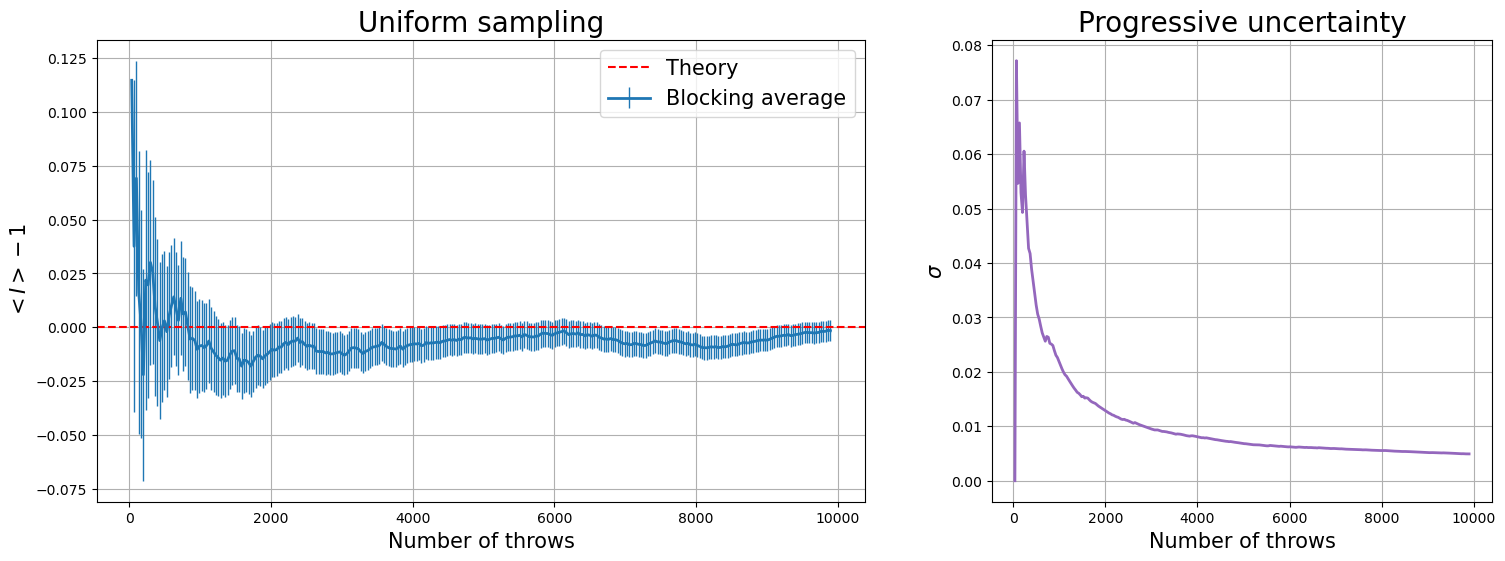

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file '2.1/2.1.1.txt', using columns 0 and 1
data = np.loadtxt('2.1/2.1.1.txt', usecols=(0, 1))

# Extract the first column of data as 'progressive_average'
progressive_average = data[:, 0]

# Extract the second column of data as 'progressive_error'
progressive_error = data[:, 1]

# Generate an array 'x' with values ranging from 33 to 9901 in steps of 33
x = np.arange(33, 9901, 33)
# Create a figure with 2 subplots, using width ratios of [2, 1.3] for the subplots
fig, axs = plt.subplots(ncols=2, gridspec_kw={'width_ratios': [2, 1.3]}, figsize=(18,6))

# Plot data in the first subplot
axs[0].errorbar(x, progressive_average-1, yerr=progressive_error,lw=2, elinewidth=1, label='Blocking average', c='tab:blue')
axs[0].grid(True)  # Add grid lines to the plot
axs[0].axhline(0, ls='--', c='red', label='Theory')  # Add a horizontal line at y=0 in red
axs[0].set_xlabel('Number of throws', fontsize=15)
axs[0].set_ylabel('$<I>-1$', fontsize=15)
axs[0].legend(fontsize=15)  # Add a legend to the plot
axs[0].set_title('Uniform sampling', fontsize=20)

# Plot data in the second subplot
axs[1].plot(x, progressive_error,lw=2, c='tab:purple')
axs[1].grid(True)  # Add grid lines to the plot
axs[1].set_xlabel('Number of throws', fontsize=15)
axs[1].set_ylabel('$\sigma$', fontsize=15)
axs[1].set_title('Progressive uncertainty', fontsize=20)

# Show the plot
plt.show()

## 2.1.2
**Importance sampling**

Using a uniform pdf is not always the best choice. For example, if we wanted to estimate the integral of a normal distribution of variance $\sigma=1$ in the domain $D=[-1000,+1000]$, by using a uniform pdf, only a handful of points would contribute to the vast percentage of the value of the integral, making the other points practically useless in the portion of the domain where the normal distribution is close to be 0. A clever strategy is to use a pdf very similar to the function we are trying to integrate.

In order to find a suitable pdf for the importance sampling I expanded the integrand: $$\frac{\pi}{2}\cos(\pi \frac{x}{2})\simeq\frac{\pi}{2}-\frac{\pi^{3}x^{2}}{16}$$ Unfortunately, this doesn't satisfy $p(x)\geq0 \forall x\in D$ therefore I changed it into $$\frac{\pi}{2}-\frac{\pi^{3}x^{2}}{2\pi^2}=\frac{\pi}{2}-\frac{\pi x^{2}}{2}$$ The last condition to meet is the normalization: $$\lambda\int_{0}^{1}\frac{\pi}{2}-\frac{\pi x^{2}}{2}=1$$ which leads to $\lambda=\frac{3}{\pi}$ and finally: $$p^{*}(x)=\frac{3}{2}-\frac{3x^2}{2}$$

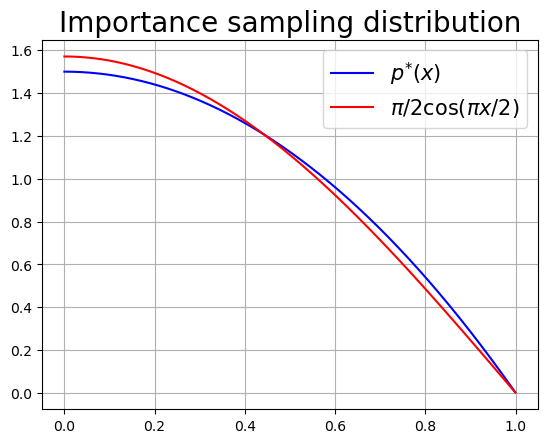

In [3]:
#Plot of the integrand and the distribution used in the importance sampling tecnique
plt.title('Importance sampling distribution', fontsize=20)
x = np.arange(0,1,0.001)
def d(x):
    return (3/2)*(1-x**2)
def integrand(x):
    return (np.pi/2)*np.cos(np.pi/2*x)
plt.plot(x, d(x), c='blue', label='$p^{*}(x)$')
plt.plot(x, integrand(x), c='red', label='${\pi}/{2}\cos(\pi{x}/{2})$')
plt.grid(True)
plt.legend(fontsize=15)
plt.show()

The importance sampling is implemented following a similar strategy to the previous exercise. The main addition is that now the points I draw are distributed according to my custom distribution. In order to do so, I added an accept-reject tecnique in `random.cpp` as follows:

```c++
double Random ::d_prob(double a, double b, double f_max, Functions *f){
   double x = Rannyu(a, b);
   double r = Rannyu();
   if (r < ((f->Evaluate(x)) / f_max))
   {
      return x;
   }
   else
   {
      return d_prob(a, b, f_max, f);
   }
}
```

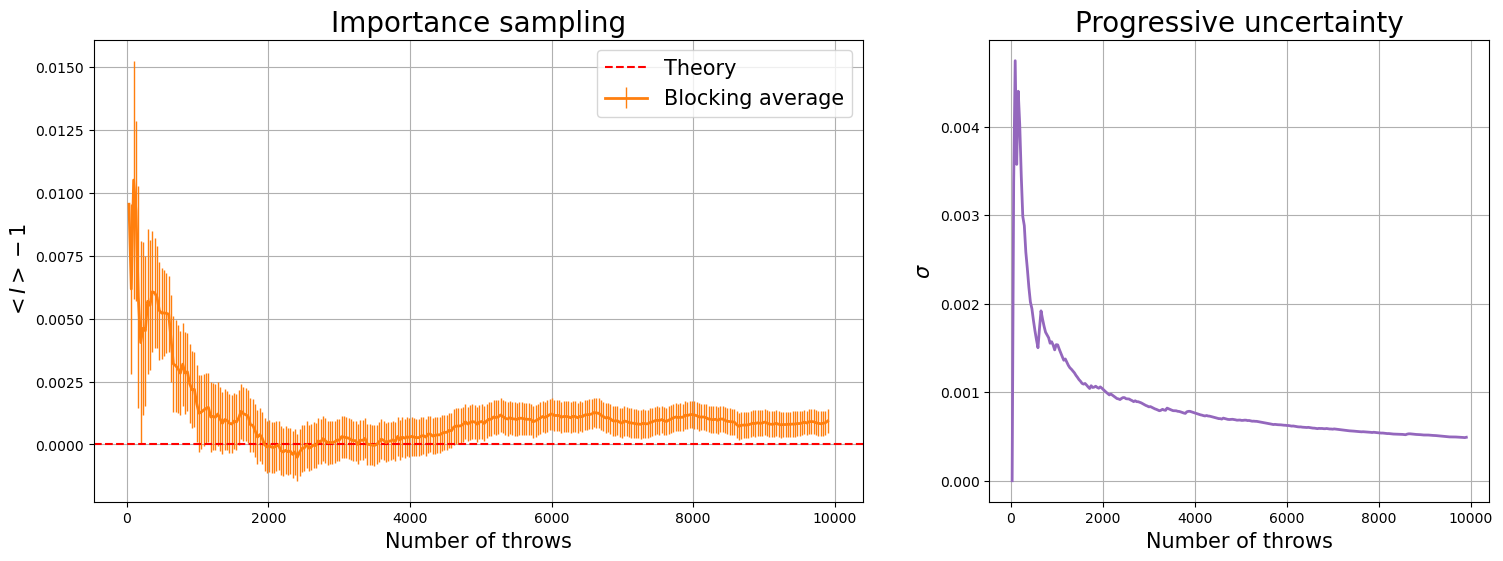

In [4]:
# Load data from file '2.1/2.1.2.txt', using columns 0 and 1
data = np.loadtxt('2.1/2.1.2.txt', usecols=(0, 1))

# Extract the first column of data as 'progressive_average'
progressive_average = data[:, 0]

# Extract the second column of data as 'progressive_error'
progressive_error = data[:, 1]

# Generate an array 'x' with values ranging from 1000 to 1000000 in steps of 10000
x = np.arange(33, 9901, 33)

# Create a figure with 2 subplots, using width ratios of [2, 1.3] for the subplots
fig, axs = plt.subplots(ncols=2, gridspec_kw={'width_ratios': [2, 1.3]}, figsize=(18,6))

# Plot data in the first subplot
axs[0].errorbar(x, progressive_average-1, yerr=progressive_error,lw=2, elinewidth=1, label='Blocking average', c='tab:orange')
axs[0].grid(True)  # Add grid lines to the plot
axs[0].axhline(0, ls='--', c='red', label='Theory')  # Add a horizontal line at y=0 in red
axs[0].set_xlabel('Number of throws', fontsize=15)
axs[0].set_ylabel('$<I>-1$', fontsize=15)
axs[0].legend(fontsize=15)  # Add a legend to the plot
axs[0].set_title('Importance sampling', fontsize=20)

# Plot data in the second subplot
axs[1].plot(x, progressive_error,lw=2, c='tab:purple')
axs[1].grid(True)  # Add grid lines to the plot
axs[1].set_xlabel('Number of throws', fontsize=15)
axs[1].set_ylabel('$\sigma$', fontsize=15)
axs[1].set_title('Progressive uncertainty', fontsize=20)

#Show the plot
plt.show()

It is even possible to do a comparison between the two:

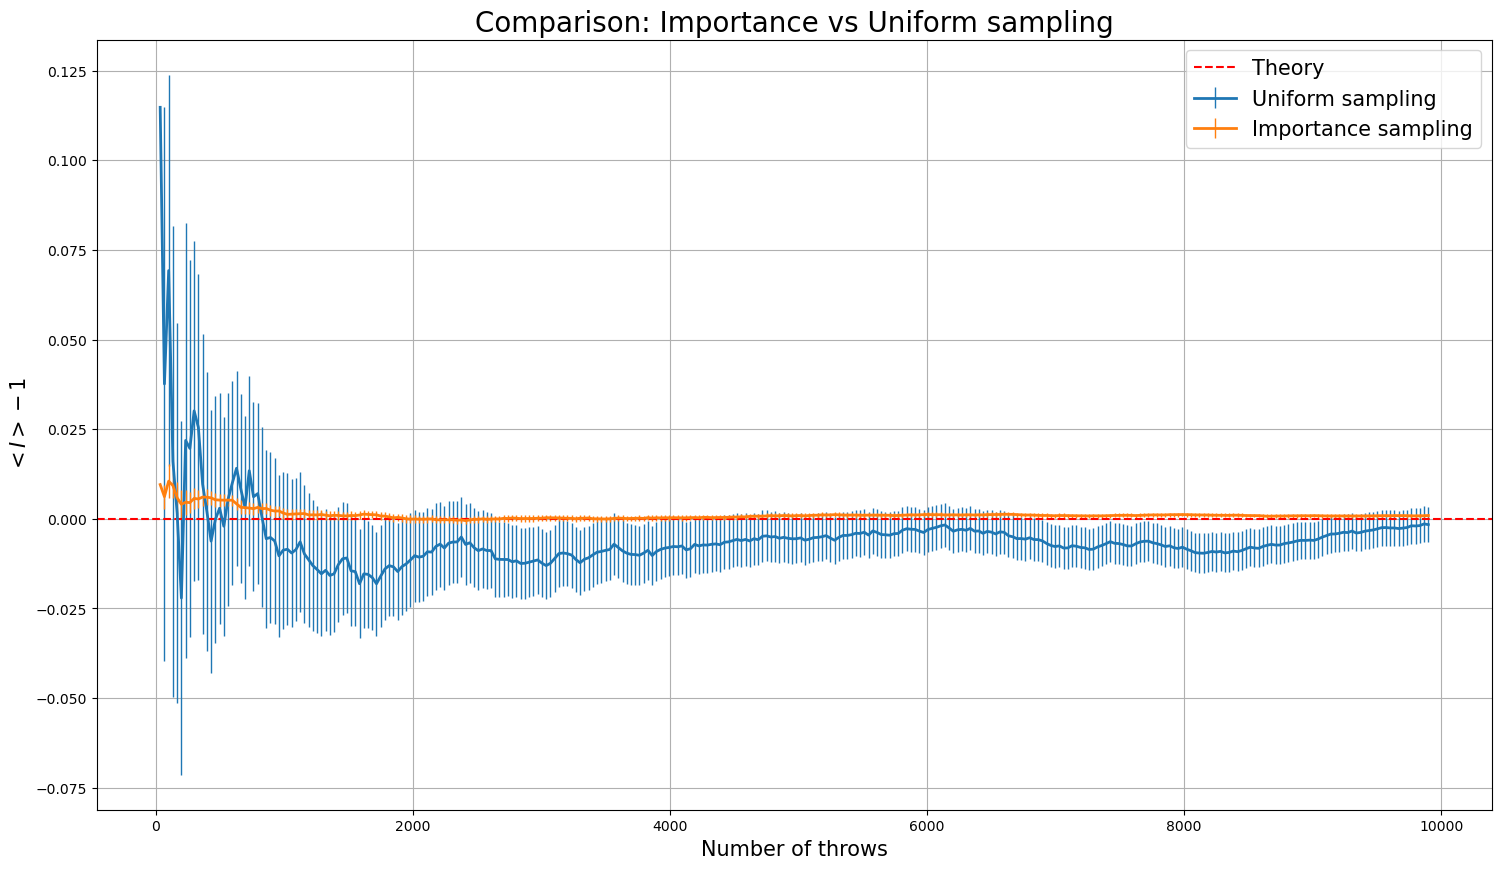

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file '1.1/1.1.1.txt', using columns 0 and 1
data = np.loadtxt('2.1/2.1.1.txt', usecols=(0, 1))
dataImp = np.loadtxt('2.1/2.1.2.txt', usecols=(0, 1))

# Extract the first column of data as 'progressive_average'
progressive_average = data[:, 0]
progressive_averageImp = dataImp[:, 0]

# Extract the second column of data as 'progressive_error'
progressive_error = data[:, 1]
progressive_errorImp = dataImp[:, 1]

# Generate an array 'x' with values ranging from 1000 to 1000000 in steps of 10000
x = np.arange(33, 9901, 33)

# Create a figure with 2 subplots, using width ratios of [2, 1.3] for the subplots
fig, axs = plt.subplots(figsize=(18,10))

# Plot data in the first subplot
axs.errorbar(x, progressive_average-1, yerr=progressive_error,lw=2, elinewidth=1, label='Uniform sampling', c='tab:blue')
axs.errorbar(x, progressive_averageImp-1, yerr=progressive_errorImp,lw=2, elinewidth=1, label='Importance sampling', c='tab:orange')
axs.grid(True)  # Add grid lines to the plot
axs.axhline(0, ls='--', c='red', label='Theory')  # Add a horizontal line at y=0 in red
axs.set_xlabel('Number of throws', fontsize=15)
axs.set_ylabel('$<I>-1$', fontsize=15)
axs.legend(fontsize=15)  # Add a legend to the plot
axs.set_title('Comparison: Importance vs Uniform sampling', fontsize=20)


#Show the plot
plt.show()

# Exercise 2.2



## Assignment


- 3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin
1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

## 2.2.1

**Discrete Random Walk**

At every time step I randomly select a direction among the possible three (x,y,z) and then, using a Bernoulli RV, I draw the step choosing between -1 and 1. 
The Bernoulli RV is obtained from the usual `Rannyou()` generator getting the floor part of the generated number:

```c++
void Random :: Step(vec &r){

   if (r.size() != 3){
      throw invalid_argument("Input vector must have size 3");
   }

   int dim = (int) Rannyu(0,3);
   int s = (int)Rannyu(0, 2) * 2 - 1;

   r[dim] += s;

}
```

As before, I implemented my exercise using the blocking method with $M=10^4$ generated random walks of 100 steps and $N=100$ blocks with $100$ RW. 
In each block, I record the value $r^{2}_{i}$ for step $i$ for every generated random walk and consequently I perform the average $\sqrt{<r^2>_{RW}}$ so that after every $100$ throws I have an average for the MSD at each time step and the associated error given by the blocking average tecnique.
Once the procedure is completed, I consider the error for each step of the walk $i$ given by the blocking average error obtained with the last block.
Finally, I perform a fit with $k\cdot\sqrt{step}$ and report the results in the first plot. In the second graph, in order to highlight the uncertainty of my random walk, I plotted the difference between the mean squared displacement and the fit function for step $i$.

In [11]:
from scipy.optimize import curve_fit
#defining the function for the fit
def fit_fun(x,a):
    return a*np.sqrt(x)

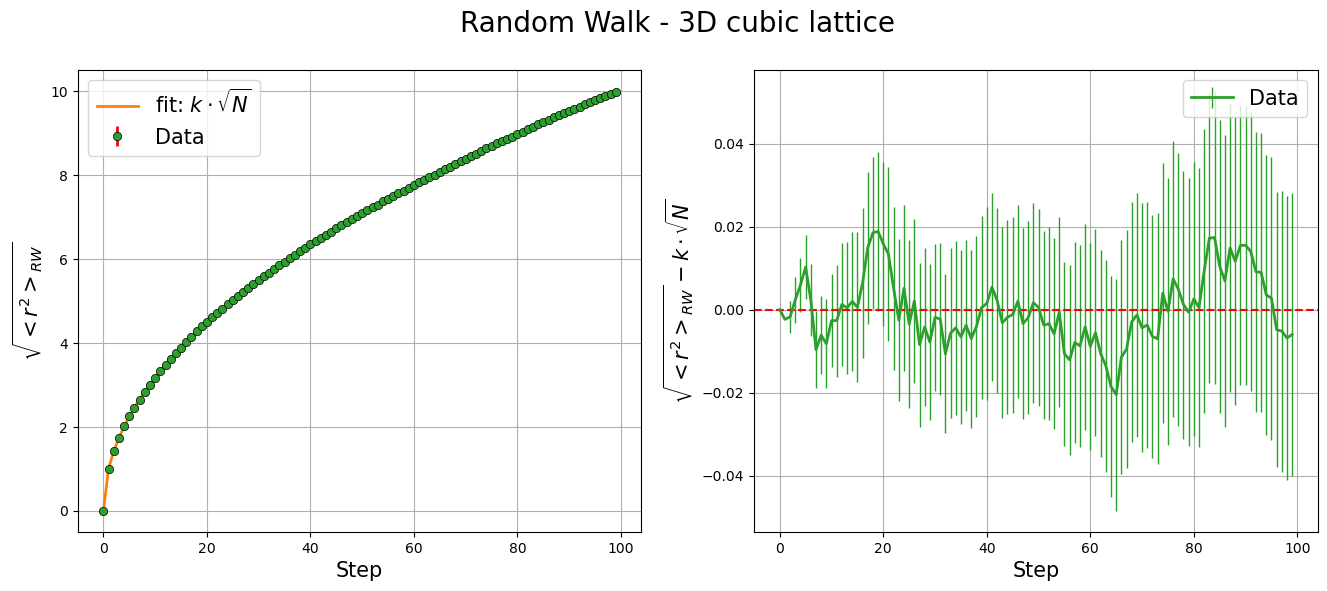

In [12]:
# Load data from file '2.2/2.2.1.txt', using columns 0 and 1
data = np.loadtxt('2.2/2.2.1.txt', usecols=(0, 1))

# Extract the first column of data as 'progressive_average'
progressive_average = data[:, 0]

# Extract the second column of data as 'progressive_error'
progressive_error = data[:, 1]

# Generate an array 'x' with values ranging from 0 to 100 in steps of 1
x = np.arange(0, 100, 1)

# Create a figure with 2 subplots
fig, axs = plt.subplots(figsize=(16,6))
fig.suptitle('Random Walk - 3D cubic lattice', fontsize=20)

plt.subplot(1,2,1)

# Plot data in the first subplot
plt.errorbar(x, progressive_average, fmt='o', mec='black', mfc='tab:green', mew=0.5, ms=6, yerr=progressive_error,lw=2, elinewidth=2, ecolor='red', label='Data', c='tab:blue')
plt.grid(True)  # Add grid lines to the plot
plt.xlabel('Step', fontsize=15)
plt.ylabel('$\sqrt{<r^2>_{RW}}$', fontsize=15)
plt.legend(fontsize=15)  # Add a legend to the plot

popt, pcov = curve_fit(fit_fun, x, progressive_average)

plt.plot(x, fit_fun(x,*popt), '-', lw=2, c='tab:orange', label='fit: $k\cdot \sqrt{N}$')

plt.legend(fontsize=15)

plt.subplot(1,2,2)

plt.errorbar(x, progressive_average-fit_fun(x,*popt), yerr=progressive_error,lw=2, elinewidth=1, ecolor='tab:green', label='Data', c='tab:green')
plt.axhline(0, ls='--', c='red')
plt.grid(True)
plt.xlabel('Step', fontsize=15)
plt.ylabel('$\sqrt{<r^2>_{RW}}-k\cdot \sqrt{N}$', fontsize=15)

plt.legend(fontsize=15)

#Show the plot
plt.show()


## 2.2.2
**Continuous Random Walk**

In order to do the same in the continuum, i first need to generate a random direction. 
This is actually a delicate procedure since generating two uniformly distributed variables for my $(\theta,\phi)$ variables would lead to points not uniformly distributed in the unit sphere surface but unbalanced towards the poles.
In view of all this, I generated 3 normally distributed coordinates (x,y,z) of  a 3D vector and by normalizing it for its magnitude I obtain a versor that lay on the unit sphere and has a random (uniform) direction.

To prove it, note that the standard normal distribution is:
$$p(x)=\frac{1}{\sqrt{2\pi}}\exp{-\frac{1}{2}x^2}$$

As X, Y, and Z each follow the standard normal distribution and are generated independently:
$$p(x,y,z)=p(v)=\frac{1}{\sqrt{2\pi}}\exp{-\frac{1}{2}x^2}\cdot\frac{1}{\sqrt{2\pi}}\exp{-\frac{1}{2}y^2}\cdot\frac{1}{\sqrt{2\pi}}\exp{-\frac{1}{2}z^2}$$

With some simple algebra:
$$p(x,y,z)=p(v)=\frac{1}{2\pi^{\frac{3}{2}}}\exp{-\frac{1}{2}(x^2+y^2+z^2)}=\frac{1}{(2\pi)^{\frac{3}{2}}}\exp{-\frac{1}{2}(|v^2|)}$$
This shows that the probability distribution of v only depends on its magnitude and not any direction θ and ϕ. The vectors v are thus indeed pointing in uniformly random directions. By finding where the ray determined by this vector v intersects the sphere, we have a sample from a uniform distribution on the sphere.
This could even be easily verified in Python:

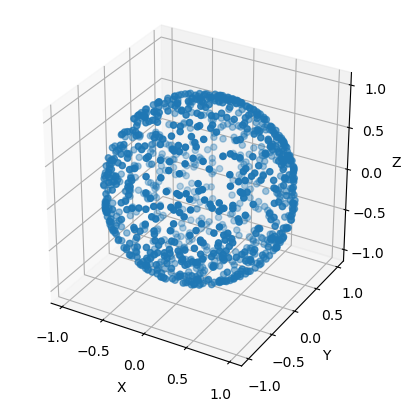

In [16]:
#draw 1000 points normally distribtuted in each axes
a = np.random.normal(size=1000)
b = np.random.normal(size=1000)
c = np.random.normal(size=1000)

#magnitude for each vector
tot = [np.sqrt(a[i]**2+b[i]**2+c[i]**2) for i in range(1000) ]

#normalization
a /= tot
b /= tot
c /= tot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(a, b, c)

ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')
ax.set_box_aspect([1,1,1])

plt.show()

Following the previous considerations, i slightly changed the `Step` function:
```c++
void Random :: CStep (vec &r){
   if (r.size() != 3){
      throw invalid_argument("Input vector must have size 3");
   }

   double x = Gauss(0,1);
   double y = Gauss(0, 1);
   double z = Gauss(0, 1);

   double magnitude = sqrt(pow(x,2)+pow(y,2)+pow(z,2));

   x /= magnitude;
   y /= magnitude;
   z /= magnitude;

   r[0] += x;
   r[1] += y;
   r[2] += z;

}
```
As before, the first plot shows the mean squared displacement fitted with $k\cdot\sqrt{step}$ while the second one is the difference between the two.

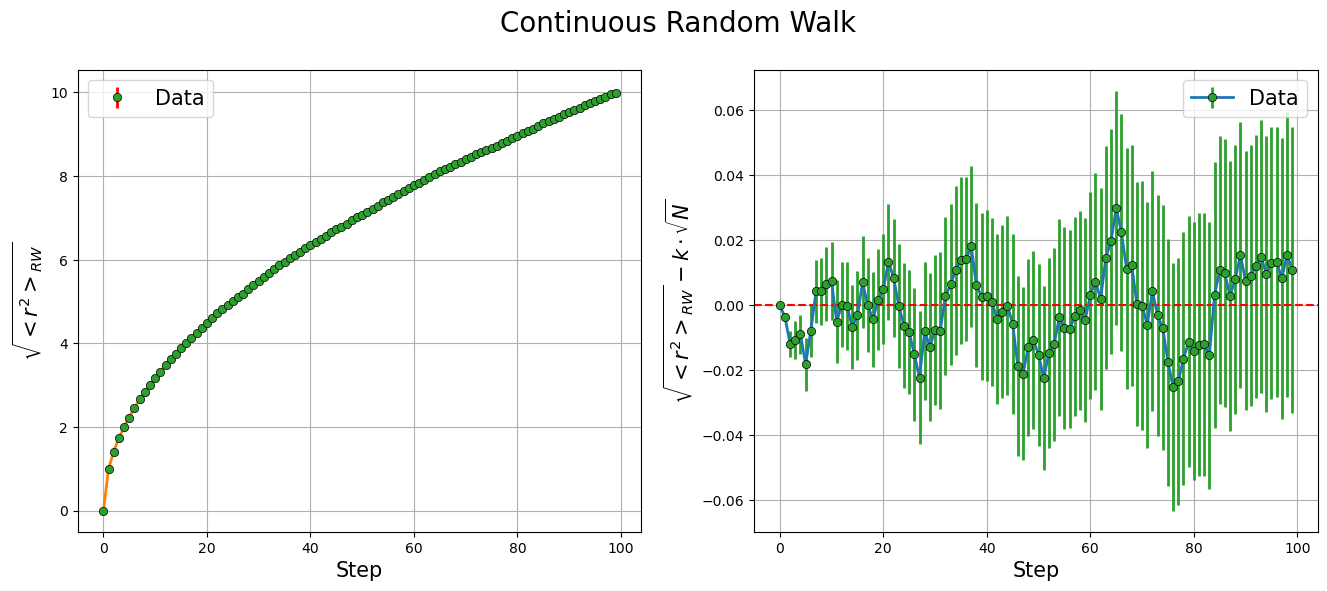

In [17]:
# Load data from file '2.2/2.2.2.txt', using columns 0 and 1
data = np.loadtxt('2.2/2.2.2.txt', usecols=(0, 1))

# Extract the first column of data as 'progressive_average'
progressive_average = data[:, 0]

# Extract the second column of data as 'progressive_error'
progressive_error = data[:, 1]

# Generate an array 'x' with values ranging from 0 to 100 in steps of 1
x = np.arange(0, 100, 1)

# Create a figure with 2 subplots
fig, axs = plt.subplots(figsize=(16,6))
fig.suptitle('Continuous Random Walk', fontsize=20)

plt.subplot(1,2,1)
# Plot data in the first subplot
plt.errorbar(x, progressive_average, fmt='o', mec='black', mfc='tab:green', mew=0.5, ms=6, yerr=progressive_error,lw=2, elinewidth=2, ecolor='red', label='Data', c='tab:blue')
plt.grid(True)  # Add grid lines to the plot
plt.xlabel('Step', fontsize=15)
plt.ylabel('$\sqrt{<r^2>_{RW}}$', fontsize=15)
plt.legend(fontsize=15)  # Add a legend to the plot
plt.legend(fontsize=15)

popt, pcov = curve_fit(fit_fun, x, progressive_average)

plt.plot(x, fit_fun(x,*popt), '-', lw=2, c='tab:orange', label='fit: $k\cdot \sqrt{N}$')

plt.subplot(1,2,2)

plt.errorbar(x, progressive_average-fit_fun(x,*popt), fmt='o-', mec='black', mfc='tab:green', mew=0.5, ms=6, yerr=progressive_error,lw=2, elinewidth=2, ecolor='tab:green', label='Data', c='tab:blue')
plt.axhline(0, ls='--', c='red')
plt.grid(True)
plt.xlabel('Step', fontsize=15)
plt.ylabel('$\sqrt{<r^2>_{RW}}-k\cdot \sqrt{N}$', fontsize=15)

plt.legend(fontsize=15)

#Show the plot
plt.show()

# DA DIRE CHE è DIFFUSIVO